In [130]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
import pickle
from skimage.transform import rescale, rotate
import noise
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = [15, 5]
import sys
sys.path.insert(1, os.getcwd()+"/../..") # Not needed if you installed SyMBac using pip
from SyMBac.drawing import raster_cell
from SyMBac.colony_simulation import ColonySimulation
from SyMBac.colony_renderer import ColonyRenderer, SimplifiedRenderer
from SyMBac.PSF import PSF_generator
from SyMBac.renderer import convolve_rescale
from skimage.util import random_noise
from scipy.ndimage import gaussian_filter

from skimage.exposure import rescale_intensity


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


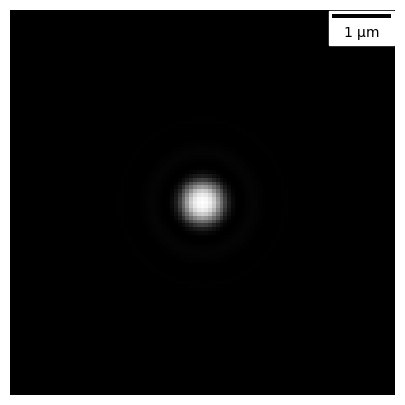

In [131]:
my_kernel = PSF_generator(
    radius = 50, 
    wavelength = 0.75, 
    NA = 1.0, 
    n = 1.4, 
    resize_amount = 1, 
    pix_mic_conv = 0.02, 
    apo_sigma = 8, 
    mode="simple fluo", 
    condenser = "Ph3",
    offset = 0
)
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

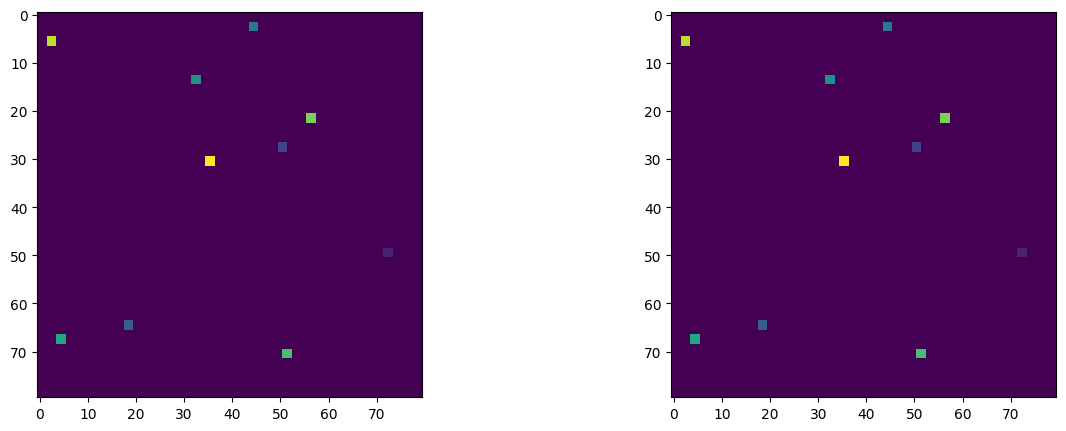

In [132]:
WIDTH = 80
HEIGHT = 80

original = np.zeros((WIDTH,HEIGHT))
mask = np.zeros((WIDTH,HEIGHT))

#Select a set of random points
RANDOM_PTS = 10
r = 1

for i in range(RANDOM_PTS):
    x = np.random.randint(r,WIDTH-r)
    y = np.random.randint(r,HEIGHT-r)
    #Draw a circle centred aobut the point
    for j in range(2*r):
        for k in range(2*r):
            if (j-r)**2 + (k-r)**2 < 25:
                original[x+j,y+k] = (i+1)/RANDOM_PTS
                mask[x+j,y+k] = (i+1)/RANDOM_PTS

f, axarr = plt.subplots(1,2)
axarr[0].imshow(original)
axarr[1].imshow(mask)
plt.show()

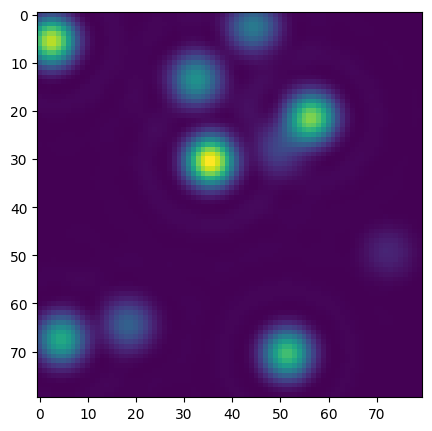

[[12557 15256 16772 ...   106    94    78]
 [20172 24094 26280 ...    95    97    91]
 [28626 33821 36701 ...    76    87    94]
 ...
 [  188   137   127 ...     5    20    46]
 [  426   334   259 ...     8    27    52]
 [  640   590   537 ...    11    33    55]]


In [133]:
my_renderer = SimplifiedRenderer(original,my_kernel)
output = my_renderer.render_scene()
plt.imshow(output)
plt.show()
print(output)


/home/boomalope/symbac/symbac/tests/dx_test_env/../../SyMBac/PSF.py:178: RuntimeWarning: invalid value encountered in divide
  PSF = (2 * jv(1, rr) / (rr)) ** 2


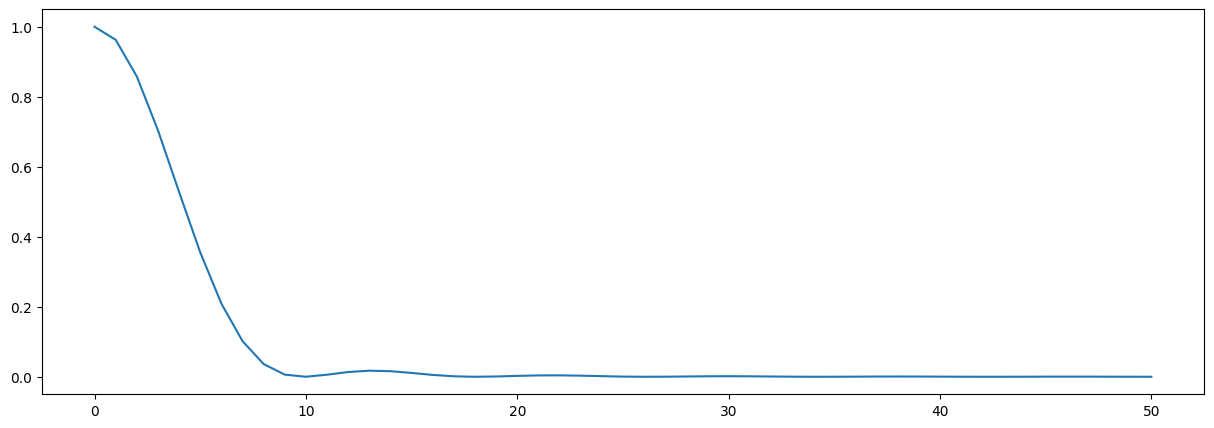

In [134]:
with open('ori.pkl', 'wb') as file: 
    pickle.dump(original, file)
with open('mask.pkl', 'wb') as file: 
    pickle.dump(mask, file)
with open('out.pkl', 'wb') as file: 
    pickle.dump(output, file)
psf = my_kernel.get_fluorescence_kernel(my_kernel.wavelength,my_kernel.NA,my_kernel.n,my_kernel.radius,my_kernel.scale)
size = psf.shape[1]
central_psf = psf[psf.shape[1]//2]
central_psf = central_psf[len(central_psf)//2:]
plt.plot(central_psf)
with open('psf.pkl', 'wb') as file: 
    pickle.dump(central_psf, file)

In [135]:
print(psf)

[[1.22360606e-04 1.18749290e-04 9.83829153e-05 ... 9.83829153e-05
  1.18749290e-04 1.22360606e-04]
 [1.18749290e-04 9.78159063e-05 6.57887630e-05 ... 6.57887630e-05
  9.78159063e-05 1.18749290e-04]
 [9.83829153e-05 6.57887630e-05 3.17538820e-05 ... 3.17538820e-05
  6.57887630e-05 9.83829153e-05]
 ...
 [9.83829153e-05 6.57887630e-05 3.17538820e-05 ... 3.17538820e-05
  6.57887630e-05 9.83829153e-05]
 [1.18749290e-04 9.78159063e-05 6.57887630e-05 ... 6.57887630e-05
  9.78159063e-05 1.18749290e-04]
 [1.22360606e-04 1.18749290e-04 9.83829153e-05 ... 9.83829153e-05
  1.18749290e-04 1.22360606e-04]]
